# Cryptography and how we learned to keep secrets

In [76]:
import math

import matplotlib.pyplot as plt

That humans are a deeply tribal species should come as no surprise to anyone but what that entails for evolution of memetics is anything but fascinating. Secrecy has evolved as just another memetic notion so much so that its an anciant art now, as information is prime advantage in this ongoing war of one-uping against the other.
Hence, the field of cryptography evolved and so did the art of cracking cryptographic systems and here we are in an arms race, in which paranoia is oddly an advantage.

So we created ways to communicate such the (eve) aka 'eve' does not know what transmitter aka 'Alice' has to tell the receiver aka 'Bob' of information, which succesfully communicating the message.

A message usually is a string of symbols (derived from a finite set called 'Alphabets' constituting that language). First we agree upon the ordering of the symbols in the alphabet and then assign them numerical values. This way we mathematize the situation (because smart ones have too much time on their hands).

**Private Key Cryptography - **

Now, a basic way to make your message obscure is to shuffle the order of the symbols such that only Alice and bob know the ordering but Eve doesn't. That way, Alice can write her message in the new ordering (aka 'Encrypt' the message) and send to Bob so that he will use the same ordering to unshuffle (aka 'Decrypt') the encrypted message and recreate the original message. If eve happens upon the messsage on the way, since the message is shuffled (deviated from the generally accepted ordering), she can't make anything of it (*potentially, as she might be able to recreate the key depending on the encryption scheme used*). Hence, cryptography is successfully done by sharing a key (Shuffling method/order) and then the message (Encrypt-Decrypt). Now, we can see a few shuffling/encryption schemes, historic and recent -

1) **Ceasar Cipher** - This cryptographic scheme was used in the Roman times. In this schema, they shifted all their symbols in the Latin Alphabets by a certain amount and used this ordering to shuffle their message. Since bob also knows by how much this shift is done ('key'), he can unshuffle the encrypted message by reversing the shift. This is an easy to implement scheme -

In [230]:
# Ceasar Cipher Encoding Decoding code -
def Ceasar_Cipher(message, key):
    ceasar_encryption = ''
    for m in message:
        ceasar_encryption+=chr(ord(m)+key)
    return ceasar_encryption

def Decrypting_Ceasar_Cipher(enc_message, key):
    dec_ceasar = ''
    for m in enc_message:
        dec_ceasar+=chr(ord(m)-key)
    return dec_ceasar

sample_message = "The Council of Elrond by Elrond in Rivendell on October 25, 3018 of the Third Age, in order to determine the fate of the One Ring. You are cordially invited."

message = ''
message = sample_message

alice_key = 3
Encrypted_Ceasar_message = Ceasar_Cipher(message,alice_key)

bob_key = alice_key
Decrypted_Ceasar_message = Decrypting_Ceasar_Cipher(Encrypted_Ceasar_message,bob_key)

print(f"Original message - \n{message}\n\nEncrypted Message - {Encrypted_Ceasar_message} \n\nDecrypted Message - {Decrypted_Ceasar_message}")

Original message - 
The Council of Elrond by Elrond in Rivendell on October 25, 3018 of the Third Age, in order to determine the fate of the One Ring. You are cordially invited.

Encrypted Message - Wkh#Frxqflo#ri#Hourqg#e|#Hourqg#lq#Ulyhqghoo#rq#Rfwrehu#58/#634;#ri#wkh#Wklug#Djh/#lq#rughu#wr#ghwhuplqh#wkh#idwh#ri#wkh#Rqh#Ulqj1#\rx#duh#frugldoo|#lqylwhg1 

Decrypted Message - The Council of Elrond by Elrond in Rivendell on October 25, 3018 of the Third Age, in order to determine the fate of the One Ring. You are cordially invited.


In [231]:
# Breaking the Ceasar Cipher - 

But it is flawed because the usage of symbols in commonly used language is not uniform and has a very predictable frequency of occurence (Check out [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law), [The mystery of Zipf's Law](https://www.youtube.com/watch?v=fCn8zs912OE)).
Hence, by seeing the the frequency of the most used symbols in the encrypted message, the shift can be figured out by Eve without having previous knowledge of the key. Hence, this cryptographic schema is unsafe and not recommendable. See the code for this cipher in practice. 

2) **Enigma Cipher** - The famed Encryption used by the Axis forces and even more famously broken by Alan Turing (Chronicalled in the movie 'The Imitatation Game'). See the code below as a simulation of Enigma Machine and the breaking of it. 

**Public Key Cryptography -**

Okay, we have seen some of the private key cryptography systems but it must have occured to you that Alice and Bob still have to exchange the keys in advance. This makes it very hard to send message safely without first having to establish the key. This only kicks the bucket down the road. This perpetual problem is solved by making the key distribution using encryption schemes that are very hard to decrypt, even though, in principle possible to crack. The main priinciple to rely upon is the complexity of reversibility of a function to be reversed with/without possesion of parts of the key. 

**One time pad** - The unbreakable cryptographic schema - 
It is is an encryption technique that cannot be cracked, but requires the use of a single-use pre-shared key that is not smaller than the message being sent. In this technique, a plaintext is paired with a random secret key (also referred to as a one-time pad). Then, each bit or character of the plaintext is encrypted by combining it with the corresponding bit or character from the pad using modular addition. 

For key distribution, there have been many ways presented.
One such way is the RSA scheme(stands for Rivest, Shamir and Adlemann, the discoverers of this scheme) which is widely used for internet communication for things like Bank transactions etc. Another is the Diffie-Helman-Merkle Scheme. We will mostly discuss RSA and its breaking.

**RSA**

So, here is the scenario - <br> 
If bob wants to receive a communication, he can just announce parts of his key. Hence, he generates these Private and Public keys.  

Let's see how we generate key using RSA - <br><br>
1) Take two prime numbers p,q, such that n=p.q <br>
2) Calculate $$\phi(n) = (p-1)(q-1)$$Its called "Euclid's Totient Function" <br>
3) Consider a number 'e' that is relative prime to $\phi(n)$.<br>
4) Calculate the Modular Multiplicative Inverse $$d = e^{-1} mod \phi(n)$$ using the "Extended Euclidean Algorithm". <br>
5) The RSA Key is ready. The private key is $$S = (n,d)$$ and the Public Key is $$P = (n,e)$$<br><br>

  

## Prime number selection given bit size - 

Read this for complete theory behind generating Prime Numbers of a given bit size - 

[https://medium.com/@ntnprdhmm/how-to-generate-big-prime-numbers-miller-rabin-49e6e6af32fb#:~:text=The%20prime%20number%20theorem%20states,ln(n))%20%3D%201.&text=As%20we%20know%20that%20primes,test%20355%20numbers%20randomly%20generated.]

Summary - 
* Direct method of checking primality is too slow for large prime numbers.
* Using Fermat's little theorem is faster but not quite reliable if applied naively.
* Using Miller Rabin theorem makes it more reliable.'

See the code below -

In [148]:
from random import randrange, getrandbits

def is_prime(n, k=128):
    """ Test if a number is prime
        Args:
            n -- int -- the number to test
            k -- int -- the number of tests to do
        return True if n is prime
    """
    # Test if n is not even.
    # But care, 2 is prime !
    if n == 2 or n == 3:
        return True
    if n <= 1 or n % 2 == 0:
        return False
    # find r and s
    s = 0
    r = n - 1
    while r & 1 == 0:
        s += 1
        r //= 2
    # do k tests
    for _ in range(k):
        a = randrange(2, n - 1)
        x = pow(a, r, n)
        if x != 1 and x != n - 1:
            j = 1
            while j < s and x != n - 1:
                x = pow(x, 2, n)
                if x == 1:
                    return False
                j += 1
            if x != n - 1:
                return False
    return True

def generate_prime_candidate(length):
    """ Generate an odd integer randomly
        Args:
            length -- int -- the length of the number to generate, in bits
        return a integer
    """
    # generate random bits
    p = getrandbits(length)
    # apply a mask to set MSB and LSB to 1
    p |= (1 << length - 1) | 1
    return p

def generate_prime_number(length=1024):
    """ Generate a prime
        Args:
            length -- int -- length of the prime to generate, in          bits
        return a prime
    """
    p = 4
    # keep generating while the primality test fail
    while not is_prime(p, 128):
        p = generate_prime_candidate(length)
    return p
# print(generate_prime_number(128))

271820310010468684569733899967818152443


In [11]:
# Calculate Modular Multiplicative inverse - Extended Euclidean Algorithm

# Iterative Python 3 program to find
# modular inverse using extended
# Euclid algorithm

# Returns modulo inverse of a with
# respect to m using extended Euclid
# Algorithm Assumption: a and m are
# coprimes, i.e., gcd(A, M) = 1


def modInverse(A, M):
    m0 = M
    y = 0
    x = 1

    if (M == 1):
        return 0

    while (A > 1):

        # q is quotient
        q = A // M
        
        t = M

        # m is remainder now, process
        # same as Euclid's algo
        M = A % M
        A = t
        t = y

        # Update x and y
        y = x - q * y
        x = t

    # Make x positive
    if (x < 0):
        x = x + m0

    return x


# Driver code
if __name__ == "__main__":
    A = 3
    M = 11

    # Function call
    print("Modular multiplicative inverse is",modInverse(A, M))

Modular multiplicative inverse is 4


In [172]:
#code for generating the RSA key -

def generate_RSA_key(bitsize):
    p = 0
    q = 0
    while p==q:
        p = generate_prime_number(bitsize)
        q = generate_prime_number(bitsize)
    print(f'p = {p}\nq = {q}\n\n')
    
    n = p*q
    print(f'n = p*q = {n}\n\n')
    
    # Totient function -
    phi = (p-1)*(q-1)
    print(f'Eulers Totient function (phi) = (p-1)*(q-1) = {phi}\n\n')
    
    # generate e
    e = generate_prime_number(int(bitsize/4))
    print(f'Generated e (relative co-prime to phi) = {e} \n\n')
    
    # Calculate Modular Multiplicative inverse - Extended Euclidean Algorithm
    d = modInverse(e, phi)
    print(f'Generated d (Modular inverse of e (mod phi)) = {d} \n\n')
    
    Public = (n,e)
    Secret = (n,d)
    print(f'Public key = (n,e) = ({n},{e}),\nPrivate key = (n,d) = ({n},{d}) \n\n')
    
    # return RSA Key
    return Public,Secret


Public_key, Private_key = generate_RSA_key(256)

p = 110924523894439291587048420569728763795624892554688385827714217785669926456731
q = 63786787644108910066932976523232478704858556319521097071443654436029187171853


n = p*q = 7075519050178483762234705280550880818091104172483366769349965825193305723063814532486855088786856879351729050756147679161476156963905287472942479065592543


Eulers Totient function (phi) = (p-1)*(q-1) = 7075519050178483762234705280550880818091104172483366769349965825193305723063639821175316540585202897954636089513647195712601947481006129600720779951963960


Generated e (relative co-prime to phi) = 14140857679592861771 


Generated d (Modular inverse of e (mod phi)) = 6193364042797054726333389129441554578568746814606237663956645136673009734987720542825224522068135145739403601985524326836818742568414889328091050578091811 


Public key = (n,e) = (7075519050178483762234705280550880818091104172483366769349965825193305723063814532486855088786856879351729050756147679161476156963905287472942479065592543,1414085767959286

Now that (receiver) has generated the private and public keys, He/She then broadcasts the Public Key. When (transmitter) wants to send a message to (receiver), he/she will use the Public Key to encrypt his\her message and sends it to (reciever).

But How does (transmitter) does the encoding? He/She encrypts the message (m) by - 
$$E(m) = m^e mod  (n)$$ 
It can be efficiently (O(logN)) calculated using "Repeated Squaring". Therefore encryption is done efficiently in RSA.

In [155]:
def Modular_exponentiation(b,p,m):
    res = 1 % m
    x = b % m
    while p: 
        if (p & 1):
            res = ( res * x ) % m
        x = ( x * x ) % m
        p = p >> 1
    return res

In [191]:
def convert_message(msg):
    msg_num = ''
    for m in msg:
        msg_num = msg_num+str(ord(m))
    return len(msg_num)
    
convert_message("The Council of Elrond by Elrond in Rivendell on October 25, 3018 of the Third Age, in order to determine the fate of the One Ring. You are cordially invited.")

413

In [180]:
# Alices's Encryption of the message -

def Encrypting_message(message,Public_key):
    p = Public_key[1]
    m = Public_key[0]
    b = message
    if b>=m:
        raise ValueError("Message bigger than key")
    
    return Modular_exponentiation(b,p,m)

In [199]:
sample_message = "The Council of Elrond by Elrond in Rivendell on October 25, 3018 of the Third Age, in order to determine the fate of the One Ring. You are cordially invited."

message = sample_message

In [200]:
message = convert_message(message)
Enc_message = Encrypting_message(message,Public_key)
print(f'Encrypted message = {Enc_message}')

Encrypted message = 6024778523011705996295180595336499144819236561742670292619304214257812345861663544185166409389966005773971183776371359122826428940827726748791818242712646


(Reciever) can then decrypt the message using the private key he/she posseses. 

In [201]:
# Receiver's Decryption of the message -
def Decrypting_message(Enc_message,Private_key):
    p = Private_key[1]
    m = Private_key[0]
    b = Enc_message
    
    return Modular_exponentiation(b,p,m)

Dec_message = Decrypting_message(Enc_message,Private_key)
print(f'message = {message},\n\nEnc_message = {Enc_message}, \n\nDecryted message = {Dec_message}, \n\nIs Message = Decrypted Message? {message==Dec_message}')

message = 413,

Enc_message = 6024778523011705996295180595336499144819236561742670292619304214257812345861663544185166409389966005773971183776371359122826428940827726748791818242712646, 

Decryted message = 413, 

Is Message = Decrypted Message? True


And viola! we have the encryption-decryption scheme to share a key. 

But is it safe?? A few billion dollar question!

Well, If in the process of transmission, ((eve)) intercepts the encrypted message, he/she still won't be able to decipher the message as he/she won't have the private key (Unless he/she can factorize n). Good thing is that decrypting this message, by factorization of n has no known efficient classical algorithm. The fastest known classical algorithm is known as the 'General Number Field Sieve'. Lets see an ihow fast it is -

The algorithmic complexity of this classical algortithm is -
$$O(N) = \exp \left(\left((64/9)^{1/3}+o(1)\right)\left(\log n\right)^{1/3}\left(\log \log n\right)^{2/3}\right)$$
where the input size is 

As you can see its a very slow algorithm considereing that commercial grade RSA implementation involve 2048 bits. Hence, it would take these many iterations to factorize a 2048-bit number. Given the best computers right now are able to do 

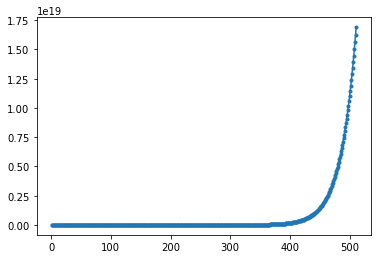

In [104]:
def GNFS_complexity(n):
    N = 2**n
    O = math.e**((64/9)**(1/3)*((math.log(N))**(1/3))*((math.log(math.log(N)))**(2/3)))
    return O

y = []
N = 512
for n in range(1,N):
    G = GNFS_complexity(n)
    y.append(G)
x = list(range(1,N))
plt.plot(x,y,'.-')
plt.show()

Fastest classical computer currently is the "Frontier" with the capacity of 2 quintillion(10^18) operations per second. It would take it - 

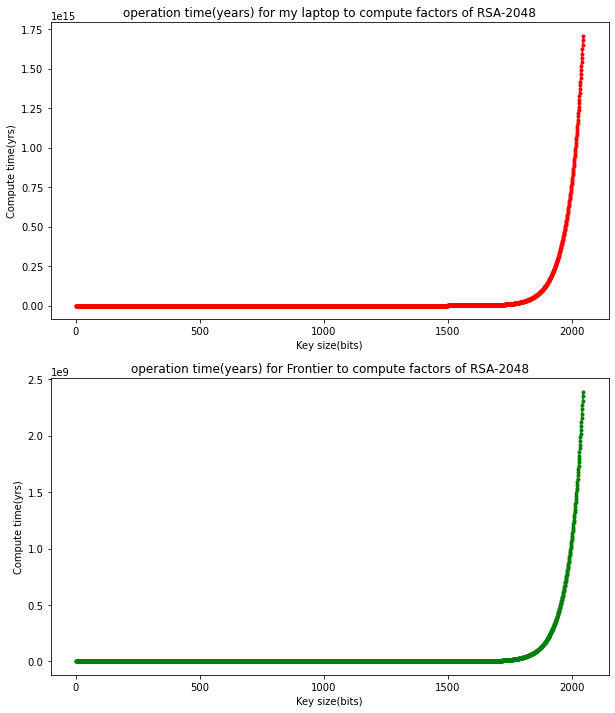

In [147]:
def compute_time(speed, operations):
    return operations/(speed*60*60*24*365)

speed_mac = 2.8*10**12
speed_Frontier = 2*10**18

y_mac = []
y_frontier = []
N = 2048
for o in range(1,N):
    operations = GNFS_complexity(o)
    y_mac.append(compute_time(speed_mac, operations))
    y_frontier.append(compute_time(speed_Frontier, operations))
    
x = list(range(1,N))
plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
plt.plot(x,y_mac,'.-r')
plt.title(f"operation time(years) for my laptop to compute factors of RSA-{N}")
plt.xlabel("Key size(bits)")
plt.ylabel("Compute time(yrs)")

plt.subplot(2, 1, 2)
plt.plot(x,y_frontier,'.-g')
plt.title(f"operation time(years) for Frontier to compute factors of RSA-{N}")
plt.xlabel("Key size(bits)")
plt.ylabel("Compute time(yrs)")

plt.show()

So, you can see how slow the classical computers are for factorizing a sufficiently large key. But what if (eve) is extraordinarily smart and has built a Quantum computer?

Then, he/she can implement shor's Algorithm to find the period of the modular exponentiation function - 
$$f_{x,n}(r) = x^r mod (n)$$
This function is periodic with respect to r. And knowing this function's period allows us to factorize an integer super fast. 

In [ ]:
So, classically, it is hopeless for a key distribution of a large size. Hence, we turn to Quantum Algorithms.

In [239]:
import functools
import json
import math
import pandas as pd
import pennylane as qml
import pennylane.numpy as np
import scipy
import matplotlib.pyplot as plt
import numpy as npo

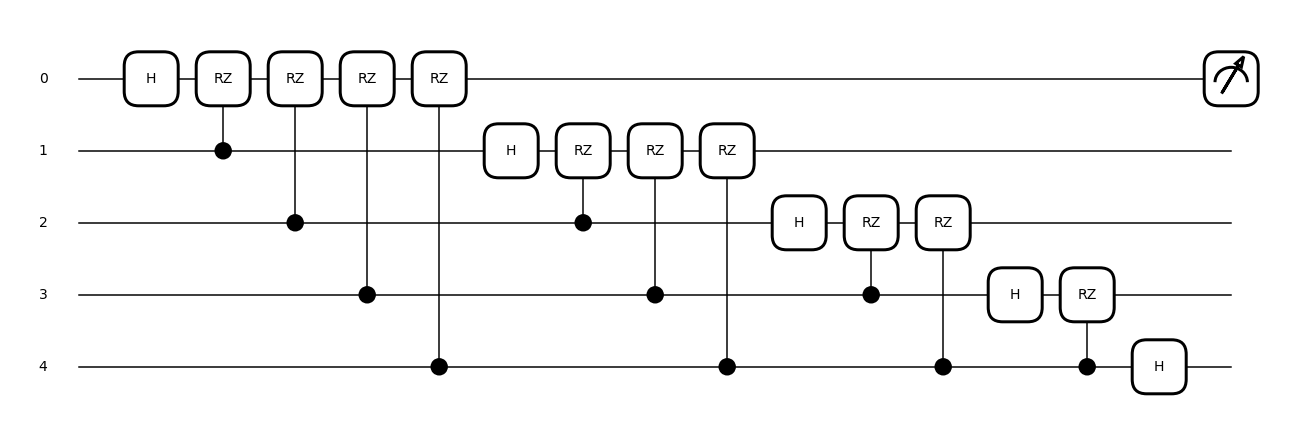

In [259]:
def QFT(n):
    dev = qml.device('default.qubit', wires = n)
    
    @qml.qnode(dev)
    def circuit(n):
        for k in range(n):
            qml.Hadamard(k)
            count=1
            for i in range(k+1,n):
                z = np.pi/(2**count)
                qml.CRZ(z, wires = [i,k])
                count+=1
        
        return qml.expval(qml.PauliZ(0))
    
    result = circuit(n)
    
    qml.drawer.use_style("black_white")
    fig, ax = qml.draw_mpl(circuit)(n)
    plt.show()
    
qubit_num = 5
QFT(qubit_num)

There is a that the RZ shown here are actually - $$CRZ_k = \begin{matrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & e^{\frac{2\pi i}{2^k}}\\
\end{matrix}$$

In [232]:
import numpy as np
import scipy.sparse as sp
from qutip.qobj import *
from qutip.qip.gates import snot, cphase, swap
from qutip.qip.circuit import QubitCircuit

/var/folders/l7/wngp29c52s1dglkg9_wnynqw0000gn/T/ipykernel_34085/2363544289.py:4: DeprecationWarning: Importation from qutip.qip.gates is deprecated.Please use e.g.
 from qutip.qip.operations import cnot

  from qutip.qip.gates import snot, cphase, swap


In [256]:
def qft(N=1):
    """
    Quantum Fourier Transform operator on N qubits.

    Parameters
    ----------
    N : int
        Number of qubits.

    Returns
    -------
    QFT: qobj
        Quantum Fourier transform operator.

    """
    if N < 1:
        raise ValueError("Minimum value of N can be 1")

    N2 = 2 ** N
    phase = 2.0j * np.pi / N2
    arr = np.arange(N2)
    L, M = np.meshgrid(arr, arr)
    L = phase * (L * M)
    L = np.exp(L)
    dims = [[2] * N, [2] * N]
    return Qobj(1.0 / np.sqrt(N2) * L, dims=dims)

qft(qubit_num)

Quantum object: dims = [[2, 2, 2, 2, 2], [2, 2, 2, 2, 2]], shape = (32, 32), type = oper, isherm = False
Qobj data =
[[ 0.1767767 +0.j          0.1767767 +0.j          0.1767767 +0.j
  ...  0.1767767 +0.j          0.1767767 +0.j
   0.1767767 +0.j        ]
 [ 0.1767767 +0.j          0.17337998+0.03448742j  0.16332037+0.06764951j
  ...  0.14698445-0.09821187j  0.16332037-0.06764951j
   0.17337998-0.03448742j]
 [ 0.1767767 +0.j          0.16332037+0.06764951j  0.125     +0.125j
  ...  0.06764951-0.16332037j  0.125     -0.125j
   0.16332037-0.06764951j]
 ...
 [ 0.1767767 +0.j          0.14698445-0.09821187j  0.06764951-0.16332037j
  ... -0.03448742+0.17337998j  0.06764951+0.16332037j
   0.14698445+0.09821187j]
 [ 0.1767767 +0.j          0.16332037-0.06764951j  0.125     -0.125j
  ...  0.06764951+0.16332037j  0.125     +0.125j
   0.16332037+0.06764951j]
 [ 0.1767767 +0.j          0.17337998-0.03448742j  0.16332037-0.06764951j
  ...  0.14698445+0.09821187j  0.16332037+0.06764951j
   0.173379

Using this we can implement Shor's Algorithm